# Project 2: Continuous Control Unimodel

This notebook demonstrates how an agent can be trained for a specific model.

All parameters are defined in the `Config` class of the `utils` module and preset to default values at instantiation. This includes all paths, hyperparameters and even the environment. 

Imported from the same module is the `MyEncoder` method to allow custom serialization

The `training` module defines the `ddpg` method implementing the DDPG algorithm used in this project to train the agent who is defined in module `ddpg_agent`.

In [1]:
from training import ddpg
from utils import Config, MyEncoder

from ddpg_agent import Agent

In [2]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

import json
import numpy as np
import pandas as pd

from itertools import product
from operator import add, sub
from time import sleep

/home/robond/anaconda3/envs/drlnd/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  


## Training

Let's now train 20 agents connected to a single brain. We want the hidden layers of the actor and critic networks to be 512 neurons deep, and we choose the discount factor $\gamma$ to be 0.96. We want the model id to be 101.

Path results already exists


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


{'device': device(type='cpu'), 'n_agents': 20, 'model_id_auto': False, 'model_id': 101, 'env_path': PosixPath('A20/Reacher.x86_64'), 'brain_name': 'ReacherBrain', 'state_dim': 33, 'action_dim': 4, 'n_episodes': 400, 'max_t': 1000, 'buffer_size': 100000, 'batch_size': 64, 'gamma': 0.96, 'tau': 0.001, 'lr_actor': 0.001, 'lr_critic': 0.0001, 'critic_weight_decay': 0, 'fc1_units': 512, 'fc2_units': 512, 'seed': 48, 'n_print': 20, 'target': 30, 'window': 100, 'target_episode': None, 'target_score': None}
Episode   20	Current Score  8.17	Avg Score  3.39	Std Score  2.47
Episode   40	Current Score 15.21	Avg Score  8.29	Std Score  5.36
Episode   60	Current Score 38.77	Avg Score 17.11	Std Score 13.73
Episode   80	Current Score 38.44	Avg Score 22.34	Std Score 14.95
Episode  100	Current Score 37.74	Avg Score 25.44	Std Score 14.74
Episode  113	Current Score 37.53	Avg Score 30.09	Std Score 11.91
Environment solved in 13 episodes	Average Score: 30.09


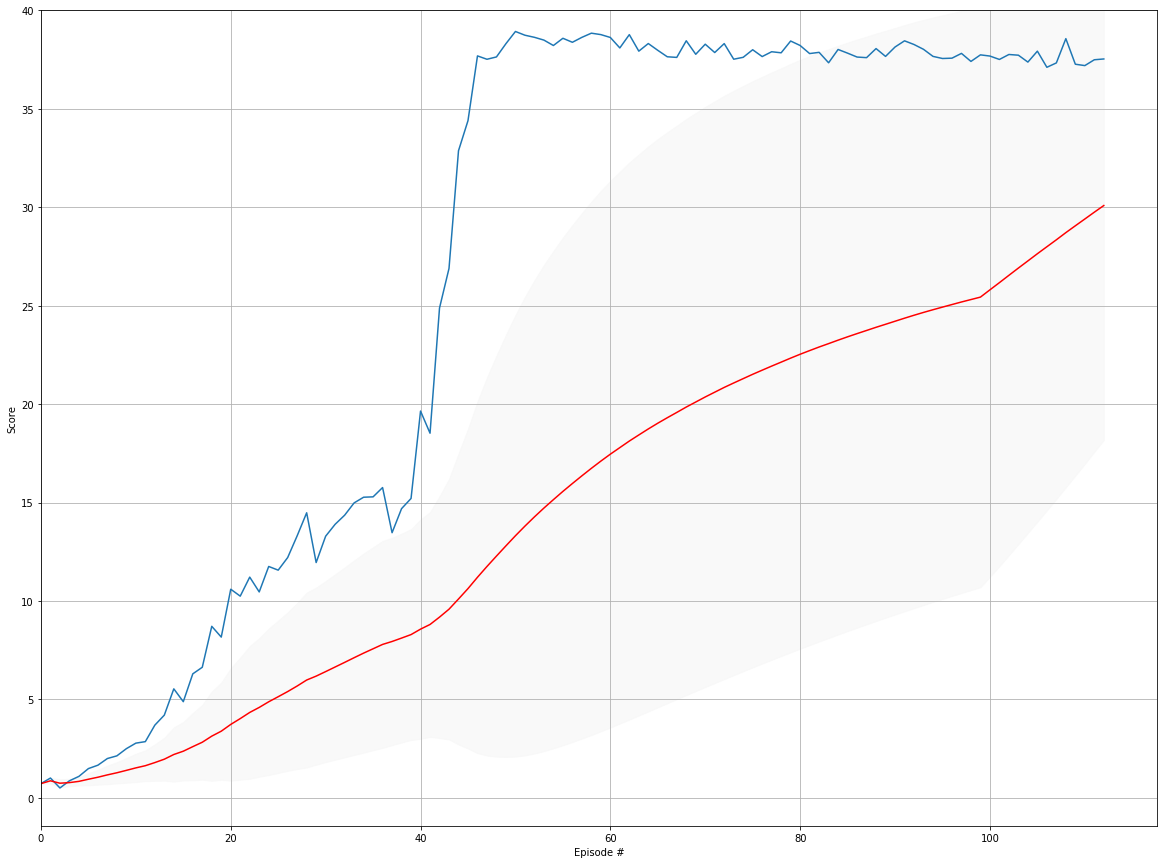

In [3]:
config = Config(n_agents=20)
config.fc1_units = 512
config.fc2_units = 512
config.gamma = 0.96
config.model_id_auto = False
config.model_id = 101

print(config.to_dict())

agent = Agent(config)

scores, ma_scores, std_scores = ddpg(agent, config)

with open(f'results/model {config.model_id}/config.json', 'w') as f:
    json.dump(config.to_dict(), f, cls=MyEncoder)

fig = plt.figure(figsize=(20, 15))

x = np.arange(len(scores))

plt.plot(x, scores)
plt.plot(x, ma_scores, color='r')
plt.ylabel('Score')
bottom, top = plt.ylim()
plt.ylim(bottom, 40)

plt.xlabel('Episode #')
left, right = plt.xlim()
plt.xlim(0, right)

plt.grid(True)

font = {'size': 12}
plt.rc('font', **font)

plt.fill_between(x, list(map(sub, ma_scores, std_scores)), list(map(add, ma_scores, std_scores)), 
color='whitesmoke', alpha=.5)

plt.savefig(f'results/model {config.model_id}/scores.png')
# plt.show()

df = pd.DataFrame({'episode': np.arange(len(scores)), 'score': scores, 'ma': ma_scores, 'std': std_scores})
df.set_index('episode', inplace=True)
df.to_csv(f'results/model {config.model_id}/scores.csv')

config.env.close()

del config